In [222]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [223]:
dataset = pd.read_csv('../data/wine_quality/winequality-red.csv', sep=';')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

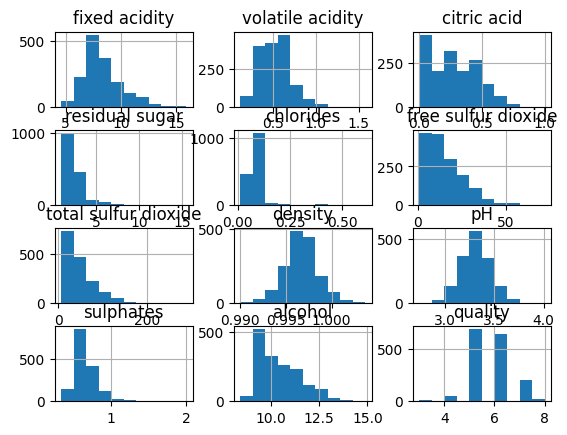

In [224]:
dataset.hist()

In [225]:
trainvalidation, test = train_test_split(dataset, test_size=0.3)
train, validation = train_test_split(trainvalidation, test_size=0.285)


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

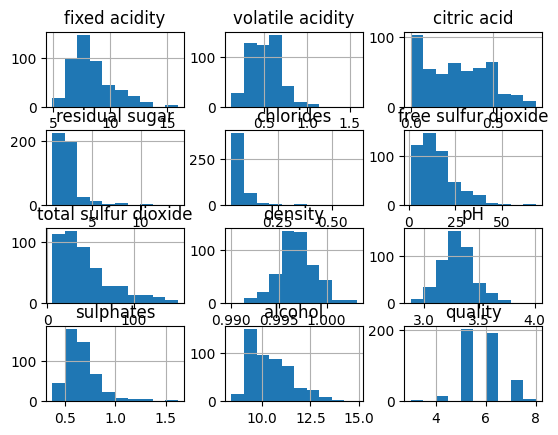

In [226]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# test.hist(ax=ax[0])
test.hist()
# dataset.hist(ax=ax[1])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

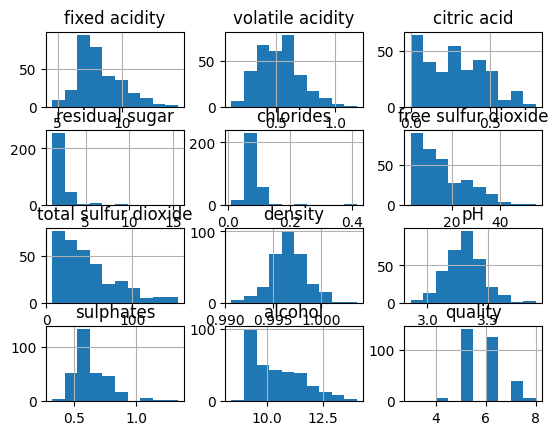

In [227]:
validation.hist()

In [228]:
dataset['quality'].value_counts()/len(dataset)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64

In [229]:
test['quality'].value_counts()/len(test)

quality
5    0.420833
6    0.402083
7    0.125000
4    0.031250
8    0.012500
3    0.008333
Name: count, dtype: float64

In [230]:
validation['quality'].value_counts()/len(validation)

quality
5    0.438871
6    0.391850
7    0.125392
4    0.021944
8    0.018809
3    0.003135
Name: count, dtype: float64

In [231]:
# train_features = train.drop(columns=['quality'])
train_features = train.drop('quality', axis=1)
validation_features = validation.drop('quality', axis=1)
test_features = test.drop('quality', axis=1)
train_targets = train['quality']
test_targets = test['quality']
validation_targets = validation['quality']

In [232]:
def evaluate(model, final_eval=False):
    train_predictions = model.predict(train_features)
    validation_predictions = model.predict(validation_features)
    print("Train MAE:", mean_absolute_error(train_targets, train_predictions))
    print("Train MSE:", mean_squared_error(train_targets, train_predictions))
    print("Train R2:", r2_score(train_targets, train_predictions))

    print("Validation MAE:", mean_absolute_error(validation_targets, validation_predictions))
    print("Validation MSE:", mean_squared_error(validation_targets, validation_predictions))
    print("Validation R2:", r2_score(validation_targets, validation_predictions))

    if final_eval:
        test_predictions = model.predict(test_features)
        print("Test MAE:", mean_absolute_error(test_targets, test_predictions))
        print("Test MSE:", mean_squared_error(test_targets, test_predictions))
        print("Test R2:", r2_score(test_targets, test_predictions))


In [233]:
dt1 = DecisionTreeRegressor()
dt1.fit(train_features, train_targets)
evaluate(dt1)

Train MAE: 0.0
Train MSE: 0.0
Train R2: 1.0
Validation MAE: 0.5297805642633229
Validation MSE: 0.7429467084639498
Validation R2: -0.14803960275761519


In [234]:
dt2 = DecisionTreeRegressor(max_depth=5)
dt2.fit(train_features, train_targets)
evaluate(dt2)

Train MAE: 0.44820561783097984
Train MSE: 0.3326481672998544
Train R2: 0.48298263111673434
Validation MAE: 0.5487556518740588
Validation MSE: 0.511875429190715
Validation R2: 0.2090236652310209


In [235]:
lr1 = LinearRegression()
lr1.fit(train_features, train_targets)
evaluate(lr1)

Train MAE: 0.5141280772840728
Train MSE: 0.43216997463653845
Train R2: 0.32830117474984033
Validation MAE: 0.4719716730376212
Validation MSE: 0.3763971298621107
Validation R2: 0.418371726365927


In [236]:

lr2 = LinearRegression(tol=1e-3)
lr2.fit(train_features, train_targets)
evaluate(lr2)

Train MAE: 0.5141280772840728
Train MSE: 0.43216997463653845
Train R2: 0.32830117474984033
Validation MAE: 0.4719716730376212
Validation MSE: 0.3763971298621107
Validation R2: 0.418371726365927


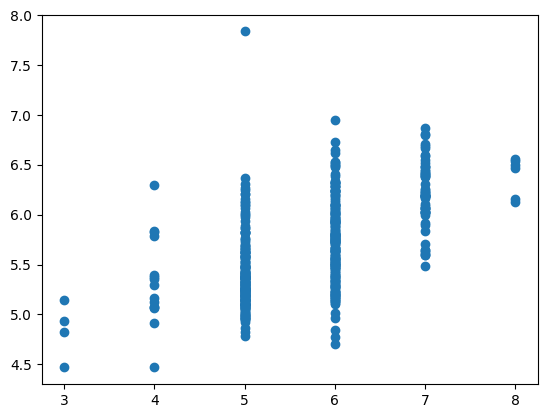

In [237]:
predictions = lr1.predict(test_features)
plt.scatter(test_targets, predictions)

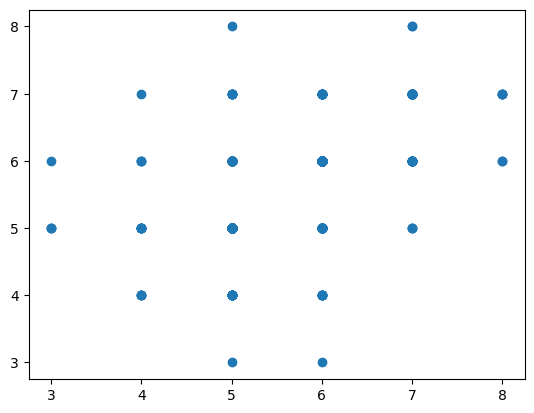

In [238]:
predictions = dt1.predict(test_features)
plt.scatter(test_targets, predictions)

[<Axes: > <Axes: >]


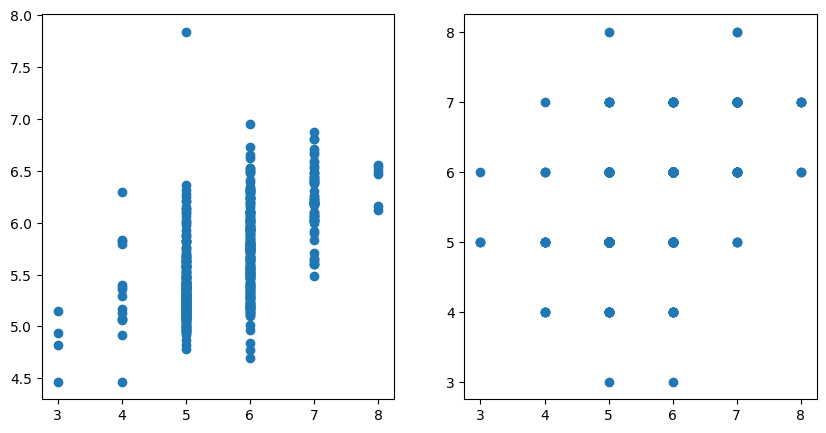

In [241]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
print(ax)
lr_predictions = lr1.predict(test_features)
ax[0].scatter(test_targets, lr_predictions)
dt_predictions = dt1.predict(test_features)
ax[1].scatter(test_targets, dt_predictions)

(array([ 1.,  3.,  3.,  1.,  0.,  2.,  1.,  6.,  6.,  1., 11.,  3.,  3.,
         6.,  3.,  3.,  1.,  3.,  0.,  3.]),
 array([5.48517823, 5.5543464 , 5.62351457, 5.69268274, 5.76185092,
        5.83101909, 5.90018726, 5.96935543, 6.03852361, 6.10769178,
        6.17685995, 6.24602812, 6.3151963 , 6.38436447, 6.45353264,
        6.52270082, 6.59186899, 6.66103716, 6.73020533, 6.79937351,
        6.86854168]),
 <BarContainer object of 20 artists>)

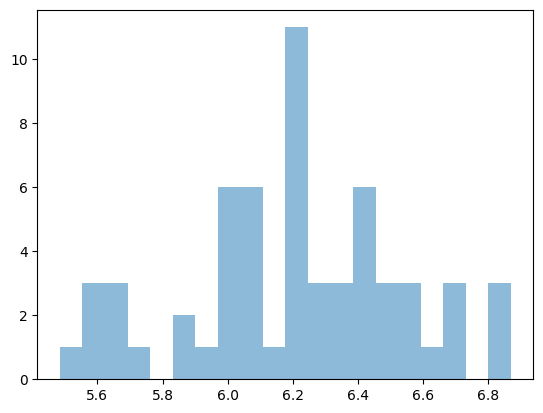

In [ ]:
lr_predictions_7 = lr_predictions[test_targets == 7]
dt_predictions_7 = dt_predictions[test_targets == 7]
plt.hist(lr_predictions_7, alpha=0.5, bins=20)
plt.hist(dt_predictions_7, alpha=0.5, bins=20)